In [19]:
# Import pandas for data handling and analysis
import pandas as pd

# Import matplotlib.pyplot and seaborn for plotting and data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split to divide the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import RandomForestClassifier for classification modeling
from sklearn.ensemble import RandomForestClassifier

# Import accuracy_score and classification_report to assess model performance
from sklearn.metrics import accuracy_score, classification_report

In [20]:
# Load the Titanic dataset from a CSV file into a pandas DataFrame
data = pd.read_csv("titanic.csv")

# Display the first 5 rows of the dataset to get a quick overview
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Display a concise summary of the dataset, including data types and non-null counts
data.info()

# Show the count of missing (null) values for each column in the dataset
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# Fill missing values in 'Age' column with the median age (to handle missing ages)
data['Age'] = data['Age'].fillna(data['Age'].median())

# Fill missing values in 'Embarked' column with the most common port (mode)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Drop the 'Cabin' column because it has many missing values and is not useful here
# The 'errors="ignore"' argument avoids errors if the column is already missing
data.drop(columns=['Cabin'], inplace=True, errors='ignore')

In [23]:
# Convert the 'Sex' column into numeric values for the model: male = 0, female = 1
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Convert the categorical 'Embarked' column into multiple binary columns (one-hot encoding)
# For example, 'Embarked_C', 'Embarked_Q', and 'Embarked_S' columns will be created
embarked_dummies = pd.get_dummies(data['Embarked'], prefix='Embarked')

# Add these new one-hot encoded columns to the original DataFrame
data = pd.concat([data, embarked_dummies], axis=1)

# Remove the original 'Embarked' column as it is now encoded
data.drop('Embarked', axis=1, inplace=True)

In [24]:
# Select the features (input variables) that the model will use to predict survival
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
            'Embarked_C', 'Embarked_Q', 'Embarked_S']

# Create the feature matrix 'X' by selecting these columns from the data
X = data[features]

# Create the target vector 'y' which contains the survival status (0 = died, 1 = survived)
y = data['Survived']

In [25]:
# Split the dataset into training and testing sets
# 80% of data will be used to train the model (X_train, y_train)
# 20% of data will be used to evaluate the model's performance (X_test, y_test)
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
# Create a Random Forest Classifier model instance
# Setting random_state=42 for reproducibility
model = RandomForestClassifier(random_state=42)

# Train (fit) the model using the training data (features and target)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Use the trained model to predict survival on the test set features
y_pred = model.predict(X_test)

# Calculate and print the accuracy of the model on the test set
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")

# Print detailed classification metrics: precision, recall, f1-score, support
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8101

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



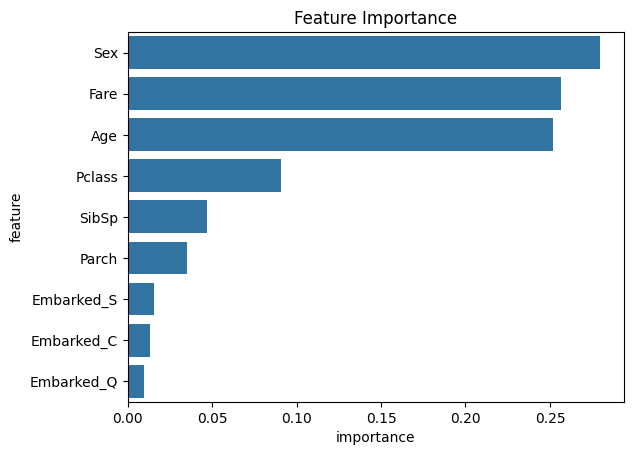

In [28]:
# Get feature importance scores from the trained Random Forest model
importances = model.feature_importances_

# Create a DataFrame to hold feature names and their corresponding importance
feature_importance_df = pd.DataFrame({
    'feature': features,
    'importance': importances
}).sort_values(by='importance', ascending=False)  # Sort descending by importance

# Plot a horizontal bar chart showing feature importance using seaborn
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()